<a href="https://colab.research.google.com/github/nisode/Unsupervised/blob/main/UnsupervisedFootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/football-match-probability-prediction/overview

# Data Loading and EDA

In [28]:
import numpy as np 
import pandas as pd 

In [29]:
!gdown --id 1Qzp2SE6rV9JjnI7pgmHyHc7OBXC3iWPP
!gdown --id 1hbcEXwrN80fhpdLZpyD3I5oVFq_fdY5L

print('Data Loaded!')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qzp2SE6rV9JjnI7pgmHyHc7OBXC3iWPP
To: /content/train_target_and_scores.csv
100% 2.00M/2.00M [00:00<00:00, 41.1MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hbcEXwrN80fhpdLZpyD3I5oVFq_fdY5L
To: /content/train.csv
100% 180M/180M [00:04<00:00, 42.9MB/s]
Data Loaded!


In [95]:
train_df = pd.read_csv('train.csv')
targets_df = pd.read_csv('train_target_and_scores.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [96]:
train_df.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: float64(162), int64(2), object(26)
memory usage: 160.8+ MB


In [98]:
train_df.columns[:20]

Index(['id', 'target', 'home_team_name', 'away_team_name', 'match_date',
       'league_name', 'league_id', 'is_cup', 'home_team_coach_id',
       'away_team_coach_id', 'home_team_history_match_date_1',
       'home_team_history_match_date_2', 'home_team_history_match_date_3',
       'home_team_history_match_date_4', 'home_team_history_match_date_5',
       'home_team_history_match_date_6', 'home_team_history_match_date_7',
       'home_team_history_match_date_8', 'home_team_history_match_date_9',
       'home_team_history_match_date_10'],
      dtype='object')

## Column Descriptions

### Descriptive Columns

* **target** - The variable you have to predict the probabilities only available in the train set.
* **home_team_name** - The name of the Home the team. Hidden in test set, see this discussion
* **away_team_name** - The name of the Away the team. Hidden in test set, see this discussion
* **match_date** - The match date (UTC).
* **league_name** - The league name.
* **league_id** - The league id. Note that league names can be identical for two differents id.
* **is_cup** - If the value is 1 the match is played for a cup compettion.
* **home_team_coach_id** - The id of the Home team coach.
* **away_team_coach_id** - The id of the Away team coach.

### Historical Columns

Historical home team features:


* **home_team_history_match_date_{i}** - The date of the last i-th match played by Home team.
* **home_team_history_is_play_home_{i}** - If 1, the Home team played home.
* **home_team_history_is_cup_{i}** - If 1, the match was a cup competition.
* **home_team_history_goal_{i}** - The number of goals scored by the Home team on its last i-th match.
* **home_team_history_opponent_goal_{i}** - The number of goals conceded by the Home team on its last i-th match.
* **home_team_history_rating_{i}** - The rating of the Home team on its last i-th match (pre match rating).
* **home_team_history_opponent_rating_{i}** - The rating of the opponent team on Home team last i-th match (pre match rating).
* **home_team_history_coach_{i}** - The coach id of the Home team on its last i-th match.
* **home_team_history_league_id_{i}** - The league name id by the Home team on its last i-th match.


Historical away team features:


* **away_team_history_match_date_{i}** - The date of the last i-th match played by Away team.
* **away_team_history_is_play_home_{i}** - If 1, the Away team played home.
* **away_team_history_is_cup_{i}** - If 1, the match was a cup competition.
* **away_team_history_goal_{i}** - The number of goals scored by the Away team on its last i-th match.
* **away_team_history_opponent_goal_{i}** - The number of goals conceded by the Away team on its last i-th match.
* **away_team_history_rating_{i}** - The rating of the Away team on its last i-th match (pre match rating).
* **away_team_history_opponent_rating_{i}** - The rating of the opponent team on Away team last i-th match (pre match rating).
* **away_team_history_coach_{i}** - The coach id of the Away team on its last i-th match.
* **away_team_history_league_id_{i}** - The league name id played by the Away on its last i-th match.

In [99]:
targets_df.head()

,id,score,target
0,11906497,2-3,away
1,11984383,1-0,home
2,11983301,2-2,draw
3,11983471,1-2,away
4,11883005,1-0,home


In [100]:
targets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      110938 non-null  int64 
 1   score   110938 non-null  object
 2   target  110938 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


## EDA

In [101]:
train_df['target'].value_counts(sort=True)

home    48113
away    35174
draw    27651
Name: target, dtype: int64

In [102]:
train_df['target'].value_counts(normalize=True, sort=True)

home    0.433693
away    0.317060
draw    0.249247
Name: target, dtype: float64

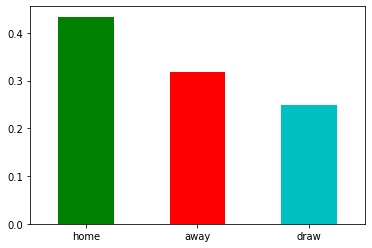

In [103]:
train_df['target'].value_counts(normalize=True, sort=True).plot.bar(rot=0, color=['g','r','c'])

In [104]:
train_df.isna().sum().to_frame()

,0
id,0
target,0
home_team_name,1
away_team_name,1
match_date,0
...,...
away_team_history_league_id_6,8426
away_team_history_league_id_7,9867
away_team_history_league_id_8,11295
away_team_history_league_id_9,12762


In [105]:
# rows with NA
train_df.isna().any(axis=1).sum()

46821

We're gonna remove any names, dates, league, and coach related variables.

In [106]:
train = train_df.drop(['home_team_name', 
                       'away_team_name', 
                       'match_date', 
                       'league_name', 
                       'league_id', 
                       'home_team_coach_id', 
                       'away_team_coach_id',
                       'home_team_history_match_date_1',
                       'home_team_history_match_date_2',
                       'home_team_history_match_date_3',
                       'home_team_history_match_date_4',
                       'home_team_history_match_date_5',
                       'home_team_history_match_date_6',
                       'home_team_history_match_date_7',
                       'home_team_history_match_date_8',
                       'home_team_history_match_date_9',
                       'home_team_history_match_date_10',
                       'home_team_history_coach_1',
                       'home_team_history_coach_2',
                       'home_team_history_coach_3',
                       'home_team_history_coach_4',
                       'home_team_history_coach_5',
                       'home_team_history_coach_6',
                       'home_team_history_coach_7',
                       'home_team_history_coach_8',
                       'home_team_history_coach_9',
                       'home_team_history_coach_10',
                       'home_team_history_league_id_1',
                       'home_team_history_league_id_2',
                       'home_team_history_league_id_3',
                       'home_team_history_league_id_4',
                       'home_team_history_league_id_5',
                       'home_team_history_league_id_6',
                       'home_team_history_league_id_7',
                       'home_team_history_league_id_8',
                       'home_team_history_league_id_9',
                       'away_team_history_league_id_10',
                       'away_team_history_match_date_1',
                       'away_team_history_match_date_2',
                       'away_team_history_match_date_3',
                       'away_team_history_match_date_4',
                       'away_team_history_match_date_5',
                       'away_team_history_match_date_6',
                       'away_team_history_match_date_7',
                       'away_team_history_match_date_8',
                       'away_team_history_match_date_9',
                       'away_team_history_match_date_10',
                       'away_team_history_coach_1',
                       'away_team_history_coach_2',
                       'away_team_history_coach_3',
                       'away_team_history_coach_4',
                       'away_team_history_coach_5',
                       'away_team_history_coach_6',
                       'away_team_history_coach_7',
                       'away_team_history_coach_8',
                       'away_team_history_coach_9',
                       'away_team_history_coach_10',
                       'away_team_history_league_id_1',
                       'away_team_history_league_id_2',
                       'away_team_history_league_id_3',
                       'away_team_history_league_id_4',
                       'away_team_history_league_id_5',
                       'away_team_history_league_id_6',
                       'away_team_history_league_id_7',
                       'away_team_history_league_id_8',
                       'away_team_history_league_id_9',
                       'away_team_history_league_id_10',], axis=1)

In [107]:
train.isna().any(axis=1).sum()

20680

In [108]:
train_final = train[['target','id', 'is_cup']]

In [109]:
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()
temp3 = pd.DataFrame()
temp4 = pd.DataFrame()
temp5 = pd.DataFrame()
temp6 = pd.DataFrame()
temp7 = pd.DataFrame()
temp8 = pd.DataFrame()
temp9 = train[['home_team_history_rating_1','home_team_history_rating_2','home_team_history_rating_3','home_team_history_rating_4','home_team_history_rating_5','home_team_history_rating_6','home_team_history_rating_7','home_team_history_rating_8','home_team_history_rating_9','home_team_history_rating_10']]
temp10 = train[['away_team_history_rating_1','away_team_history_rating_2','away_team_history_rating_3','away_team_history_rating_4','away_team_history_rating_5','away_team_history_rating_6','away_team_history_rating_7','away_team_history_rating_8','away_team_history_rating_9','away_team_history_rating_10']]
temp11 = train[['home_team_history_goal_1','home_team_history_goal_2','home_team_history_goal_3','home_team_history_goal_4','home_team_history_goal_5','home_team_history_goal_6','home_team_history_goal_7','home_team_history_goal_8','home_team_history_goal_9','home_team_history_goal_10']]
temp12 = train[['away_team_history_goal_1','away_team_history_goal_2','away_team_history_goal_3','away_team_history_goal_4','away_team_history_goal_5','away_team_history_goal_6','away_team_history_goal_7','away_team_history_goal_8','away_team_history_goal_9','away_team_history_goal_10']]

In [110]:
for i in range(1, 11):
  temp1['goal_diff_home_'+str(i)] = train['home_team_history_goal_'+str(i)] - train['home_team_history_opponent_goal_'+str(i)]
  temp2['home_team_rating_diff_'+str(i)] = train['home_team_history_rating_'+str(i)] - train['home_team_history_opponent_rating_'+str(i)]
  temp3['home_team_rating_goal_diff_'+str(i)] = temp2['home_team_rating_diff_'+str(i)] * temp1['goal_diff_home_'+str(i)]
  temp4['goal_diff_is_home_'+str(i)] = temp1['goal_diff_home_'+str(i)] * train['home_team_history_is_play_home_'+str(i)]
  temp5['goal_diff_away_'+str(i)] = train['away_team_history_goal_'+str(i)] - train['away_team_history_opponent_goal_'+str(i)]
  temp6['away_team_rating_diff_'+str(i)] = train['away_team_history_rating_'+str(i)] - train['away_team_history_opponent_rating_'+str(i)]
  temp7['away_team_rating_goal_diff_'+str(i)] = temp6['away_team_rating_diff_'+str(i)] * temp5['goal_diff_away_'+str(i)]
  temp8['goal_diff_is_away_'+str(i)] = temp5['goal_diff_away_'+str(i)] * train['away_team_history_is_play_home_'+str(i)]

In [111]:
train_final['avg_goal_diff_home'] = temp1.mean(axis=1)
train_final['avg_home_team_rating_diff'] = temp2.mean(axis=1)
train_final['home_team_rating_goal_diff'] = temp3.mean(axis=1)
train_final['goal_diff_is_home'] = temp4.mean(axis=1)
train_final['avg_goal_diff_away'] = temp5.mean(axis=1)
train_final['avg_away_team_rating_diff'] = temp6.mean(axis=1)
train_final['away_team_rating_goal_diff'] = temp7.mean(axis=1)
train_final['goal_diff_is_home_away'] = temp8.mean(axis=1) * - 1
train_final['target_rating_diff'] = temp9.mean(axis=1) - temp10.mean(axis=1)
train_final['goals_home_less_2'] = temp11.mean(axis=1) < 2
train_final['goals_away_less_2'] = temp12.mean(axis=1) < 2
train_final['goals_home_away_less_2'] = train_final['goals_home_less_2'] * train_final['goals_away_less_2']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [112]:
train_final.isna().any(axis=1).sum()

1986

In [113]:
train_final.isna().sum()

target                           0
id                               0
is_cup                           1
avg_goal_diff_home            1159
avg_home_team_rating_diff     1159
home_team_rating_goal_diff    1159
goal_diff_is_home             1159
avg_goal_diff_away            1226
avg_away_team_rating_diff     1226
away_team_rating_goal_diff    1226
goal_diff_is_home_away        1226
target_rating_diff            1985
goals_home_less_2                0
goals_away_less_2                0
goals_home_away_less_2           0
dtype: int64

In [114]:
train_final['target'].value_counts(normalize=True, sort=True)

home    0.433693
away    0.317060
draw    0.249247
Name: target, dtype: float64

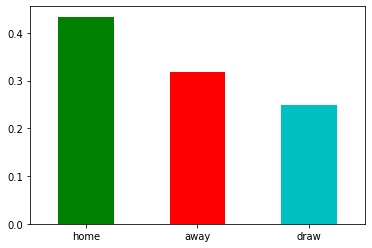

In [115]:
train_final['target'].value_counts(normalize=True, sort=True).plot.bar(rot=0, color=['g','r','c'])

In [116]:
X = train_final.dropna(axis=0)
X.isna().sum()

target                        0
id                            0
is_cup                        0
avg_goal_diff_home            0
avg_home_team_rating_diff     0
home_team_rating_goal_diff    0
goal_diff_is_home             0
avg_goal_diff_away            0
avg_away_team_rating_diff     0
away_team_rating_goal_diff    0
goal_diff_is_home_away        0
target_rating_diff            0
goals_home_less_2             0
goals_away_less_2             0
goals_home_away_less_2        0
dtype: int64

In [117]:
y = X['target']

In [118]:
y[0:10]

0    away
1    home
2    draw
3    away
4    home
5    draw
6    home
7    away
8    home
9    home
Name: target, dtype: object

In [119]:
X.drop(['target', 'id'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108952 entries, 0 to 110937
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   is_cup                      108952 non-null  object 
 1   avg_goal_diff_home          108952 non-null  float64
 2   avg_home_team_rating_diff   108952 non-null  float64
 3   home_team_rating_goal_diff  108952 non-null  float64
 4   goal_diff_is_home           108952 non-null  float64
 5   avg_goal_diff_away          108952 non-null  float64
 6   avg_away_team_rating_diff   108952 non-null  float64
 7   away_team_rating_goal_diff  108952 non-null  float64
 8   goal_diff_is_home_away      108952 non-null  float64
 9   target_rating_diff          108952 non-null  float64
 10  goals_home_less_2           108952 non-null  bool   
 11  goals_away_less_2           108952 non-null  bool   
 12  goals_home_away_less_2      108952 non-null  bool   
dtypes: bool(3), fl

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Modeling

In [33]:
from sklearn.model_selection import train_test_split

In [121]:
full_train = train.dropna()
full_y = full_train['target']
full_train = full_train.drop(['id', 'target'], axis=1)

In [122]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234)

In [123]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(full_train, full_y, test_size=0.2, random_state=1234)

In [124]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=3, random_state=1234)
km_model.fit(X_train)

KMeans(n_clusters=3, random_state=1234)

In [165]:
km_model2 = KMeans(n_clusters=3, random_state=1234)
km_model2.fit(X2_train)

KMeans(n_clusters=3, random_state=1234)

## Predicitons and Accuracy

In [143]:
preds = km_model.predict(X_train)
np.unique(preds, return_counts=True)

(array([0, 1, 2], dtype=int32), array([70943,  1144, 15074]))

In [163]:
import itertools

def label_permute_compare(y,preds):
    uniques = np.unique(preds)
    max_perm = 0
    max_accuracy = 0
    perms = itertools.permutations(['away', 'home', 'draw'])
    for perm in perms:
        preds_copy = pd.Series(preds, copy=True)
        preds_copy.replace(to_replace=uniques, value=perm, inplace=True)
        curr_accuracy = np.sum(np.array(preds_copy) == np.array(y))/len(preds_copy)
        if curr_accuracy > max_accuracy:
            max_perm = perm
            max_accuracy = curr_accuracy
    return max_perm, max_accuracy

In [164]:
label_permute_compare(y_train, preds)

(('home', 'draw', 'away'), 0.41285666754626493)

In [166]:
preds_full = km_model2.predict(X2_train)

In [167]:
label_permute_compare(y2_train, preds_full)

(('home', 'away', 'draw'), 0.35226989446860374)

Predict on validation set.

In [168]:
preds_valid = km_model.predict(X_valid)
label_permute_compare(y_valid, preds_valid)

(('home', 'draw', 'away'), 0.4121426276903309)

In [169]:
np.unique(preds_valid, return_counts=True)

(array([0, 1, 2], dtype=int32), array([17801,   301,  3689]))

In [172]:
label_valid = pd.Series(preds_valid).replace(to_replace=[0,1,2], value=('home', 'draw', 'away'))

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, label_valid)

array([[1302,  114, 5523],
       [ 667,   41, 4640],
       [1720,  146, 7638]])

Compared to just predicting the home team every time:

In [176]:
pred_basic = ['home']*len(y_valid)
np.sum(pred_basic == y_valid)/len(pred_basic)

0.43614336193841496